In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
data=pd.read_csv("C:/Users/HP/Downloads/covid.csv")

In [3]:
data.head()

,id,unique_id,government_id,diagnosed_date,age,gender,detected_city,detected_city_pt,detected_district,detected_state,nationality,current_status,status_change_date,notes,current_location,current_location_pt,contacts
0,1,1,KL-TS-P1,2020-01-30,20.0,Female,Thrissur,SRID=4326;POINT (76.21325419999999 10.5256264),Thrissur,Kerala,India,Recovered,2020-02-14,Travelled from Wuhan.\nStudent from Wuhan,NaN,SRID=4326;POINT (76.21325419999999 10.5256264),[]
1,2,2,KL-AL-P1,2020-02-02,NaN,Unknown,Alappuzha,SRID=4326;POINT (76.333482 9.498000100000001),Alappuzha,Kerala,India,Recovered,2020-02-14,Travelled from Wuhan.\nStudent from Wuhan,NaN,SRID=4326;POINT (76.333482 9.498000100000001),[]
2,3,3,KL-KS-P1,2020-02-03,NaN,Unknown,Kasaragod,SRID=4326;POINT (80 20),Kasaragod,Kerala,India,Recovered,2020-02-14,Travelled from Wuhan.\nStudent from Wuhan,NaN,SRID=4326;POINT (80 20),[]
3,4,4,DL-P1,2020-03-02,45.0,Male,East Delhi (Mayur Vihar),SRID=4326;POINT (80 20),East Delhi,Delhi,India,Recovered,2020-03-15,"Travelled from Austria, Italy.\nTravel history...",NaN,SRID=4326;POINT (80 20),"[22,23,24,25,26,27,47]"
4,5,5,TS-P1,2020-03-02,24.0,Male,Hyderabad,SRID=4326;POINT (78.4349398685041 17.4263524),Hyderabad,Telangana,India,Recovered,2020-03-02,".\nTravel history to Dubai, Singapore contact",NaN,SRID=4326;POINT (78.4349398685041 17.4263524),[]


In [4]:
data.describe()

,id,unique_id,age
count,1025.000000,1025.000000,473.000000
mean,513.000000,513.001951,40.059197
std,296.036315,296.039693,17.716957
min,1.000000,1.000000,-1.000000
25%,257.000000,257.000000,25.000000
50%,513.000000,513.000000,37.000000
75%,769.000000,769.000000,55.000000
max,1025.000000,1026.000000,96.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   1025 non-null   int64  
 1   unique_id            1025 non-null   int64  
 2   government_id        245 non-null    object 
 3   diagnosed_date       1025 non-null   object 
 4   age                  473 non-null    float64
 5   gender               1025 non-null   object 
 6   detected_city        637 non-null    object 
 7   detected_city_pt     1025 non-null   object 
 8   detected_district    902 non-null    object 
 9   detected_state       1025 non-null   object 
 10  nationality          406 non-null    object 
 11  current_status       1024 non-null   object 
 12  status_change_date   1022 non-null   object 
 13  notes                1021 non-null   object 
 14  current_location     15 non-null     object 
 15  current_location_pt  1024 non-null   o

In [6]:
data.drop(columns=["current_location","government_id"],axis=1,inplace=True)

In [7]:
data['diagnosed_date'] = pd.to_datetime(data['diagnosed_date'])
data['status_change_date'] = pd.to_datetime(data['status_change_date'])

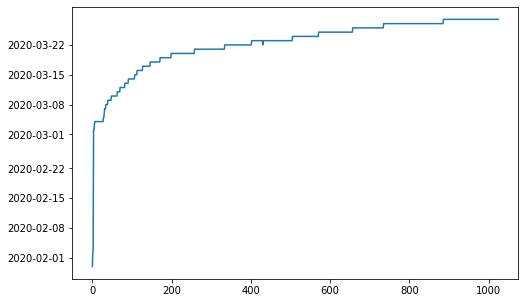

In [8]:
data['diagnosed_date'].plot(figsize=(8,5), legend=False)

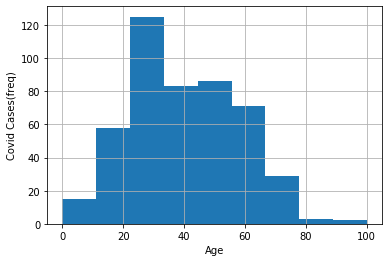

In [9]:
fig,ax = plt.subplots()
bins=np.linspace(0,100,10)
ax.hist(data['age'],bins=bins)
plt.grid()
plt.xlabel("Age")
plt.ylabel("Covid Cases(freq)")
plt.show()

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0DFEDB90>],
      dtype=object)

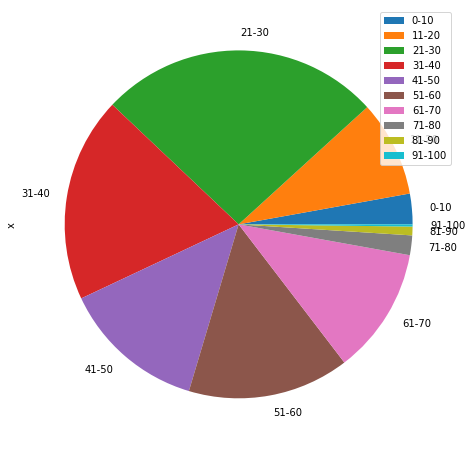

In [10]:
df = pd.DataFrame([14,44,129,94,66,74,58,9,4,1], index=['0-10', '11-20', '21-30', '31-40', '41-50'
, '51-60', '61-70', '71-80', '81-90', '91-100'], columns=['x'])
 
# make the plot
df.plot(kind='pie', subplots=True, figsize=(8, 8))

In [11]:
data.gender.value_counts()

Unknown    510
Male       339
Female     176
Name: gender, dtype: int64

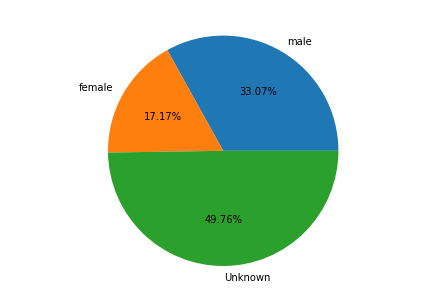

In [12]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
sex = ['male','female','Unknown']
num=[339,176,510]
ax.pie(num,labels = sex,autopct='%1.2f%%')
plt.show()

In [13]:
sectors = ['schools & other educational organization shutdown','public places shutdown',
            'work from home started for employees','country under lockdown','current situation']
dates = ['2020-03-10','2020-03-13','2020-03-16','2020-03-21','2020-03-26']

In [14]:
data = data.sort_values(by="diagnosed_date")


In [15]:
school = (data['diagnosed_date'] > '2020-01-30') & (data['diagnosed_date'] <= '2020-03-09') # before school lockdown
school = len(data.loc[school])
public_places = (data['diagnosed_date'] > '2020-01-30') & (data['diagnosed_date'] <= '2020-03-12') #before public place shutdown
public_places = len(data.loc[public_places])
work_from_home= (data['diagnosed_date'] > '2020-01-30') & (data['diagnosed_date'] <= '2020-03-15') # beforw wfh
work_from_home = len(data.loc[work_from_home])
under_lockdown = (data['diagnosed_date'] > '2020-01-30') & (data['diagnosed_date'] <= '2020-03-21') # under lockdown
under_lockdown= len(data.loc[under_lockdown])
current_situation= (data['diagnosed_date'] > '2020-01-30') & (data['diagnosed_date'] <= '2020-03-26') # Current situation
current_situation= len(data.loc[current_situation])

In [16]:
case_counts = [school,public_places,work_from_home,under_lockdown,current_situation]

In [17]:
plot_data = pd.DataFrame({'dates':dates,'counts':case_counts,'Sectors':sectors})
plot_data

,dates,counts,Sectors
0,2020-03-10,47,schools & other educational organization shutdown
1,2020-03-13,81,public places shutdown
2,2020-03-16,112,work from home started for employees
3,2020-03-21,333,country under lockdown
4,2020-03-26,734,current situation


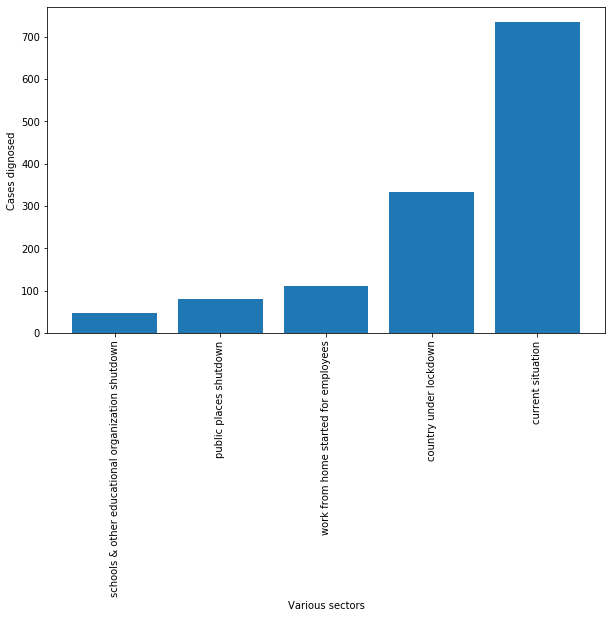

In [18]:
fig, ax = plt.subplots(figsize = (10,6))
labels = sectors

plt.bar(labels,case_counts)
plt.xticks(sectors,rotation=90)
plt.xlabel("Various sectors")
plt.ylabel("Cases dignosed")
plt.show()

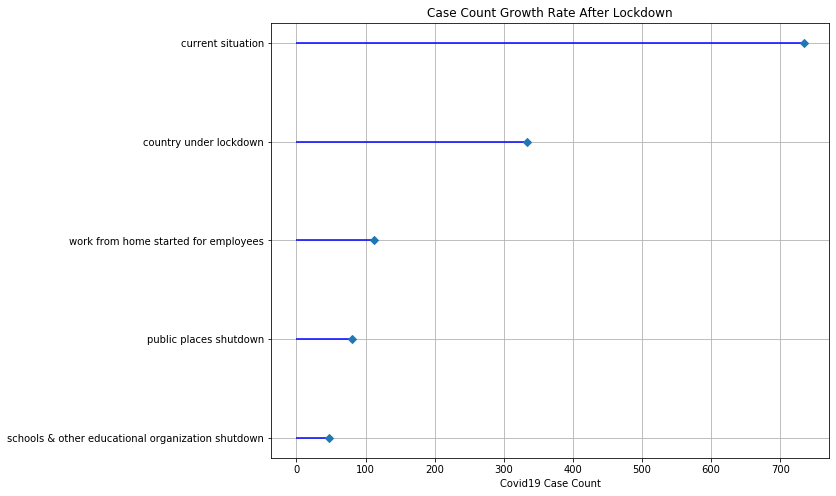

In [19]:
fig, ax = plt.subplots(figsize=(10,8))
plt.hlines(y=plot_data.Sectors, xmin=0, xmax=plot_data.counts, color='blue')
plt.plot(plot_data.counts, plot_data.Sectors, "D")
# Add titles and axis names
ax.xaxis.label.set_color('black')
plt.grid()
plt.yticks(plot_data.Sectors)
plt.title("Case Count Growth Rate After Lockdown")
plt.xlabel('Covid19 Case Count', fontsize=10)
plt.show()

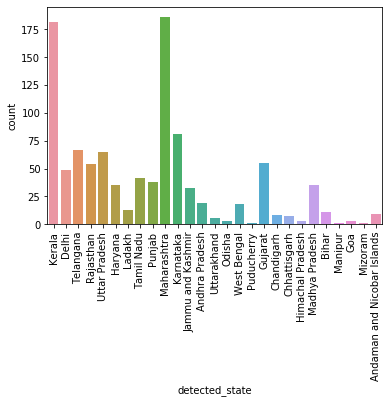

In [20]:
chart=sns.countplot(x = "detected_state", data = data)
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
plt.show()

In [21]:
data["current_status"].value_counts()

Hospitalized    975
Recovered        31
Deceased         18
Name: current_status, dtype: int64

In [22]:
Status = pd.DataFrame([974,31,18],index = ['Hospitalized','Recovered','Deceased'],columns = ['Count'])
Status

,Count
Hospitalized,974
Recovered,31
Deceased,18


array([<matplotlib.axes._subplots.AxesSubplot object at 0x0F32CC10>],
      dtype=object)

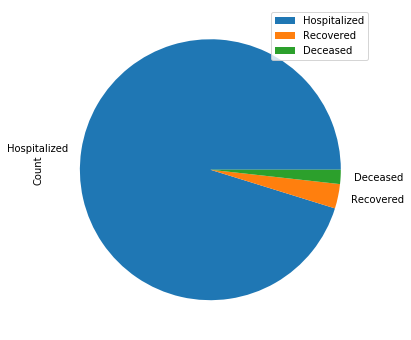

In [23]:
Status.plot(kind='pie',subplots=True,figsize=(6,6))

In [24]:
data['diagnosed_date'] = pd.to_datetime(data['diagnosed_date'])
data['status_change_date'] = pd.to_datetime(data['status_change_date'])
data['days'] = data['status_change_date'] - data['diagnosed_date']
data['days']

0      15 days
1      12 days
2      11 days
3      13 days
4       0 days
         ...  
932     0 days
933     0 days
934     0 days
928     0 days
1024    0 days
Name: days, Length: 1025, dtype: timedelta64[ns]